In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data_df_initial = pd.read_csv(Path("df_final_outer_patrick.csv"))
data_df_initial = data_df_initial.dropna()
names_df = data_df_initial['Player']
data_df = data_df_initial.drop(columns=['Player','Tm','Unnamed: 0','Cap Hit'])


In [3]:
data_df

,Salary,Age,GP,G,A,PTS,+/-,PIM,PS,EV,...,Tm_VAN,Tm_VEG,Tm_WPG,Tm_WSH,Pos_C,Pos_D,Pos_F,Pos_LW,Pos_RW,Pos_W
0,"10,000,000",25.0,66.000000,35.000000,47.000000,82.000000,32.000000,54.000000,9.900000,19.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,"10,000,000",25.0,23.000000,9.000000,8.000000,17.000000,2.000000,8.000000,1.900000,6.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,"10,000,000",35.0,56.000000,12.000000,42.000000,54.000000,-6.000000,32.000000,4.300000,10.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,"10,000,000",29.0,68.000000,28.000000,22.000000,50.000000,-12.000000,22.000000,5.500000,23.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,"9,500,000",30.0,61.000000,23.000000,36.000000,59.000000,-3.000000,26.000000,5.900000,18.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,"500,000",34.0,41.333333,2.666667,8.000000,10.666667,-10.000000,9.333333,0.200000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
657,"412,500",34.0,24.666667,5.333333,6.666667,12.000000,3.333333,8.000000,1.266667,4.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
659,"7,500,000",25.0,61.000000,15.000000,42.000000,57.000000,38.000000,26.000000,9.500000,12.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
661,"4,000,000",29.0,69.000000,6.000000,13.000000,19.000000,-21.000000,49.000000,2.500000,6.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [4]:
#for salary in data_df['Salary']:
#    data_df['Salary'] = int(data_df['Salary'].replace(',',''))
#    print(data_df)

data_df["Salary"] = data_df["Salary"].replace('[,]', '', regex=True).astype(float)
data_df["Salary"]


0      10000000.0
1      10000000.0
2      10000000.0
3      10000000.0
4       9500000.0
          ...    
656      500000.0
657      412500.0
659     7500000.0
661     4000000.0
674     4500000.0
Name: Salary, Length: 628, dtype: float64

In [5]:
# Create our features

#y = data_df["Salary"].astype(float)
y = data_df["Salary"]



In [6]:
# Create our target
X = data_df.drop(columns=['Salary'])

In [7]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
# Scale the training and testing data
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [9]:
y = y.array
y =y.reshape(-1, 1)

y_train = y_train.array
y_train =y_train.reshape(-1, 1)

y_test= y_test.array
y_test =y_test.reshape(-1, 1)

In [10]:
X_scaler = scaler.fit(X)
X = X_scaler.transform(X)

In [11]:
y_scaler = scaler.fit(y)
y = y_scaler.transform(y)

In [12]:
y_scaler = scaler.fit(y_train)
y_train = y_scaler.transform(y_train)
y_test = y_scaler.transform(y_test)

In [13]:
y_test

array([[-0.53916514],
       [-0.19153203],
       [-0.00612771],
       [ 0.04022337],
       [-0.77092055],
       [ 0.74707736],
       [-0.73268091],
       [ 0.96724499],
       [ 1.66251121],
       [-0.77092055],
       [-0.42328744],
       [ 1.1990004 ],
       [ 2.12602202],
       [ 0.27197878],
       [ 1.08312269],
       [ 0.73548959],
       [-0.46963852],
       [-0.77092055],
       [ 0.04022337],
       [ 0.04022337],
       [ 0.96724499],
       [ 0.50373418],
       [-0.70139393],
       [-0.77092055],
       [-0.74774501],
       [-0.77092055],
       [-0.73268091],
       [-0.77092055],
       [-0.77092055],
       [ 1.59298458],
       [ 0.44579533],
       [-0.16835649],
       [-0.74774501],
       [-0.0872421 ],
       [-0.73268091],
       [ 0.27197878],
       [-0.92735545],
       [-0.55075291],
       [-0.70139393],
       [-0.77092055],
       [-0.77092055],
       [ 0.52690972],
       [-0.5159896 ],
       [ 0.80501621],
       [ 0.73548959],
       [ 3

In [14]:
## Linear regression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")


The r2 is -83686011.38110936.
The mean squared error is 85601156.88197432.
The root mean squared error is 9252.089325226725.
The standard deviation is 1.0.


In [15]:
## Lasso
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The r2 is 0.3341847652986185.
The mean squared error is 0.6810523376418761.
The root mean squared error is 0.8252589518701848.


In [16]:
## DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The r2 is -0.24239087184884478.
The mean squared error is 1.2708228400887756.
The root mean squared error is 1.1273077840983692.


In [17]:
## HuberRegressor (factors in outliers)
from sklearn.linear_model import HuberRegressor, LinearRegression
model = HuberRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The r2 is 0.30865259770684306.
The mean squared error is 0.7071688058708461.
The root mean squared error is 0.8409332945429417.


C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [18]:
## data must be very non linear, maybe use Tensorflow or Keras

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [19]:
tf.random.set_seed(420)

In [20]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8177396004881675749
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5731516416
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3569031456836784530
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [21]:
X.shape

(628, 62)

In [22]:
number_inputs = 62
number_hidden_nodes = 1800

In [23]:
nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="sigmoid"))
nn.add(Dense(1, activation="sigmoid"))

In [24]:
# Compile model
nn.compile(loss=keras.losses.MeanSquaredError(), optimizer="adam",metrics=["mean_squared_error"])

In [25]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1800)              113400    
                                                                 
 dense_1 (Dense)             (None, 1)                 1801      
                                                                 
Total params: 115,201
Trainable params: 115,201
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Fit the model
nn_model = nn.fit(X_train, y_train, epochs=1900)

Epoch 1/1900
15/15 [==============================] - 3s 3ms/step - loss: 1.0159 - mean_squared_error: 1.0159
Epoch 2/1900
15/15 [==============================] - 0s 4ms/step - loss: 0.9996 - mean_squared_error: 0.9996
Epoch 3/1900
15/15 [==============================] - 0s 4ms/step - loss: 0.9997 - mean_squared_error: 0.9997
Epoch 4/1900
15/15 [==============================] - 0s 3ms/step - loss: 0.9995 - mean_squared_error: 0.9995
Epoch 5/1900
15/15 [==============================] - 0s 3ms/step - loss: 0.9990 - mean_squared_error: 0.9990
Epoch 6/1900
15/15 [==============================] - 0s 3ms/step - loss: 0.9968 - mean_squared_error: 0.9968
Epoch 7/1900
15/15 [==============================] - 0s 4ms/step - loss: 0.9570 - mean_squared_error: 0.9570
Epoch 8/1900
15/15 [==============================] - 0s 4ms/step - loss: 0.9379 - mean_squared_error: 0.9379
Epoch 9/1900
15/15 [==============================] - 0s 4ms/step - loss: 0.8714 - mean_squared_error: 0.8714
Epoch 10/1

In [ ]:
y_pred = nn.predict(X_test)

In [ ]:
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

5/5 - 0s - loss: 0.7266 - mean_squared_error: 0.7266 - 114ms/epoch - 23ms/step
Normal Neural Network - Loss: 0.7265523672103882, Accuracy: 0.7265523672103882



Bad key text.latex.preview in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, 

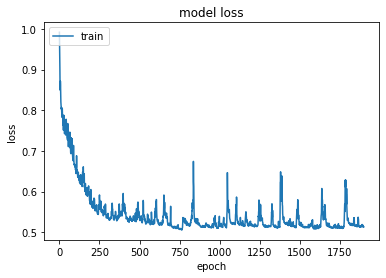

In [ ]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(nn_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Compute the metrics for the linear regression model
from sklearn.metrics import mean_squared_error, r2_score
#score = nn_model.score(X_test, y_test, sample_weight=None)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The r2 is 0.06699231633929748.
The mean squared error is 0.7265523857058603.
The root mean squared error is 0.8523804231127439.
The standard deviation is 1.0.


In [ ]:
y_pred = nn.predict(X)

In [ ]:
data_df_initial["Y Scaled"] = y

In [ ]:
data_df_initial["Y Pred"]= y_pred

In [ ]:
data_df_initial.head(50)

,Unnamed: 0,Player,Tm,Salary,Cap Hit,Age,GP,G,A,PTS,...,Tm_WPG,Tm_WSH,Pos_C,Pos_D,Pos_F,Pos_LW,Pos_RW,Pos_W,Y Scaled,Y Pred
0,0,Mikko Rantanen,COL,"10,000,000","9,250,000",25.0,66.0,35.0,47.0,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.469678,0.999935
1,1,Jack Eichel,VEG,"10,000,000","10,000,000",25.0,23.0,9.0,8.0,17.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.469678,0.997527
2,2,Blake Wheeler,WPG,"10,000,000","8,250,000",35.0,56.0,12.0,42.0,54.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.469678,0.996521
3,3,Jeff Skinner,BUF,"10,000,000","9,000,000",29.0,68.0,28.0,22.0,50.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.469678,0.998510
4,4,Vladimir Tarasenko,STL,"9,500,000","7,500,000",30.0,61.0,23.0,36.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.238929,0.993665
5,5,Oliver Ekman-Larsson,VAN,"9,240,000","7,260,000",30.0,67.0,4.0,17.0,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.118940,0.971699
6,6,Justin Faulk,STL,"9,000,000","6,500,000",29.0,62.0,9.0,25.0,34.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.008181,0.991149
7,7,Sidney Crosby,PIT,"9,000,000","8,700,000",34.0,58.0,26.0,46.0,72.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.008181,0.989246
8,8,Anders Lee,NYI,"9,000,000","7,000,000",31.0,62.0,25.0,16.0,41.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.008181,0.426451
9,9,Kevin Hayes,PHI,"9,000,000","7,142,857",29.0,35.0,8.0,16.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.008181,0.957965


In [ ]:
df_review = data_df_initial

In [ ]:
df_review=df_review.sort_values("Y Pred")

In [ ]:
df_review.head(20)

,Unnamed: 0,Player,Tm,Salary,Cap Hit,Age,GP,G,A,PTS,...,Tm_WPG,Tm_WSH,Pos_C,Pos_D,Pos_F,Pos_LW,Pos_RW,Pos_W,Y Scaled,Y Pred
617,689,Anthony Angello,PIT,"750,000","725,000",25.0,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.799175,5.578334e-17
637,709,Petteri Lindbohm,FLA,"750,000","750,000",28.0,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.799175,1.457290e-16
569,635,Jeremy Davies,NSH,"750,000","750,000",25.0,5.000000,0.000000,1.000000,1.000000,...,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.799175,2.957743e-16
163,192,Miles Wood,NJD,"3,500,000","2,750,000",26.0,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.469944,2.692266e-15
435,491,Justin Barron,MTL,"832,500","925,000",20.0,4.000000,0.000000,0.666667,0.666667,...,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.761101,9.616622e-14
542,606,Jordan Harris,MTL,"750,000","842,500",21.0,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.799175,1.217841e-13
469,526,Morgan Barron,WPG,"832,500","925,000",23.0,10.000000,0.000000,0.666667,0.666667,...,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.761101,9.387429e-13
609,677,Adam Brooks,WPG,"750,000","725,000",25.0,10.500000,1.000000,0.500000,1.500000,...,0.250000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.799175,1.039593e-12
526,586,Mason Geertsen,NJD,"750,000","725,000",26.0,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.799175,1.173671e-12
540,604,Michael Pezzetta,MTL,"750,000","750,000",23.0,44.000000,5.000000,3.000000,8.000000,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.799175,2.009763e-12


In [ ]:
df_review.tail(20)

,Unnamed: 0,Player,Tm,Salary,Cap Hit,Age,GP,G,A,PTS,...,Tm_WPG,Tm_WSH,Pos_C,Pos_D,Pos_F,Pos_LW,Pos_RW,Pos_W,Y Scaled,Y Pred
50,66,Gabriel Landeskog,COL,"6,000,000","7,000,000",29.0,51.0,30.0,29.0,59.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.623688,0.996100
2,2,Blake Wheeler,WPG,"10,000,000","8,250,000",35.0,56.0,12.0,42.0,54.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.469678,0.996521
59,75,Nate Schmidt,WPG,"6,000,000","5,950,000",30.0,66.0,4.0,27.0,31.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.623688,0.997109
12,12,Ryan McDonagh,TBL,"8,400,000","6,750,000",32.0,60.0,3.0,18.0,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.731282,0.997146
13,13,Cale Makar,COL,"8,000,000","9,000,000",23.0,65.0,24.0,51.0,75.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.546683,0.997261
83,101,Travis Konecny,PHI,"5,250,000","5,500,000",24.0,66.0,12.0,31.0,43.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.277565,0.997447
48,64,Jason Zucker,PIT,"6,250,000","5,500,000",30.0,32.0,6.0,8.0,14.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.739062,0.997489
1,1,Jack Eichel,VEG,"10,000,000","10,000,000",25.0,23.0,9.0,8.0,17.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.469678,0.997527
102,121,Jonathan Marchessault,VEG,"5,000,000","5,000,000",31.0,65.0,28.0,30.0,58.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.162190,0.997544
38,39,Nathan MacKinnon,COL,"6,850,000","6,300,000",26.0,53.0,22.0,50.0,72.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.015961,0.997808
